In [11]:
import plotly.plotly as py
import plotly.graph_objs as go
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import xlrd
import gc
import numpy as np
gc.collect()

0

In [12]:

# rain in 2017 2018 in t
year_list=["2017","2018"]
data=[]
for year in year_list:
    url="https://www.cwb.gov.tw/V7/climate/dailyPrecipitation/Data/466920_"+year+".htm"
    res=requests.get(url)
    soup=BeautifulSoup(res.text, "html5lib")
    day=31
    for i in range(1,day+1):
        temp=soup.select("table")[1].select("tr")[i].text.replace(" ","").split("\n")
        temp=temp[1:-1]
        for j in range(1,13):
            data_dic={}
            if temp[j]=="":
                continue
            elif temp[j]=="-":
                data_dic["rain"]="0"
            elif temp[j]=="T":
                 data_dic["rain"]="0.1"
            elif temp[j]=="X":
                 data_dic["rain"]="nan"
            else:
                data_dic["rain"]=temp[j]

            if  (j<10):    
                if (i<10):
                    data_dic["date"]=year+ "0"+ str(j)+"0"+temp[0]
                else:
                    data_dic["date"]=year+ "0"+ str(j)+""+temp[0]
            else:
                if (i<10):
                    data_dic["date"]=year+ ""+ str(j)+"0"+temp[0]
                else:
                    data_dic["date"]=year+ ""+ str(j)+""+temp[0]

            data.append(data_dic)

In [13]:
rain_data = pd.DataFrame(data)
rain_data["New_datetime"]=pd.to_datetime(rain_data["date"],format='%Y%m%d', errors='ignore')
rain_data=rain_data.sort_values("New_datetime")
del rain_data["date"]
rain_data=rain_data.set_index("New_datetime")
rain_data.head()

,rain
New_datetime,
2017-01-01,0
2017-01-02,0
2017-01-03,0.6
2017-01-04,0
2017-01-05,0


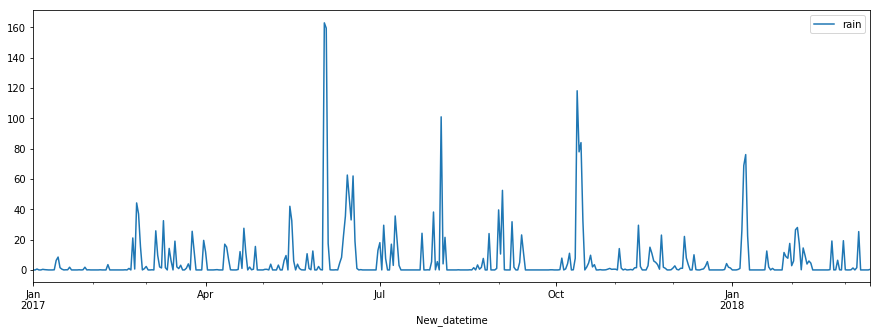

In [14]:
rain_data=rain_data.astype(float)
rain_data.plot(figsize=(15,5))

In [15]:
data = [
    go.Scatter(
        x=rain_data.index,
        y=rain_data["rain"],
        name='Rain v.s. Time',
        error_y=dict(
            type='data',
            array=[0.1]*len(rain_data["rain"]),
            visible=True
        )

    )
]
py.iplot(data, filename='error-bar-horizontal')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~KungRayHo/0 or inside your plot.ly account where it is named 'error-bar-horizontal'
